
# Project: Investigate a No-show appointments Data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### This data set is about medical appointments in Brazil and it provides info on patients who had appointments and whether they showed up to the appointment or not, I want to to explore what are the things that can tell us whether a patient may or may not miss their appointment
### I will try to explore the commonality and differences of patients who show up to their appointments and thoose who don't on differenet angles such as:
#### whether the day of the week of appointments has any significance? 
#### whether the day that patients scheduled on has any significance ?
#### does the age of patients affect whether they will show up or not?
#### does patients with scholarship and those who don't differ?
#### does the gender of patients matter?

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [95]:
# Loading data
df = pd.read_csv('no_show_appointments.csv')

In [96]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [97]:
# general info
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [98]:
# checkingcolumns and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [99]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
#### Data looks clean, there are no missing values only age has some -1 values that need to dealth with, the only work to be done it to convert some columns to the more suited data type to that column

In [100]:
## how many rows with age of less than zero
to_be_dropped = df.index[df['Age'] < 0].tolist()
to_be_dropped

[99832]

In [101]:
# since we only have one row with invalid age we might just drop that row
df.drop(to_be_dropped,axis=0,inplace=True)

In [102]:
# These cloumns need to be a date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [104]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

In [106]:
# I want to have the day names in seprate column
df['appointment_week_day'] = df['AppointmentDay'].dt.day_name()

In [107]:
df['scheduled_week_day'] = df['ScheduledDay'].dt.day_name()

In [108]:
# I want to have a present column so that if the patient came it would be 1 else 0 
# this can help me with calculations later
# I will use the below method to create this column
def isPresent(str):
    if str =='No':
        return 1
    else:
        return 0;

In [109]:
df['present'] = df['No-show'].apply(isPresent)

In [110]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,appointment_week_day,scheduled_week_day,present
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,1


### 

<a id='eda'></a>
## Exploratory Data Analysis

### What Makes patients miss their appointment?
#### I want to have an Idea on what are the things that may have an effect on patients missing their appointments

### Does the day of the week of appointments have any siginficance that makes patients miss their appointment?

In [112]:
appointment_week_days =  df.groupby('appointment_week_day')['present'].mean()

In [113]:
days = list(appointment_week_days.index)
present_percentage = appointment_week_days *100 ## 
present_percentage

appointment_week_day
Friday       78.773858
Monday       79.351942
Saturday     76.923077
Thursday     80.645909
Tuesday      79.906396
Wednesday    80.310821
Name: present, dtype: float64

In [114]:
days

['Friday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday']

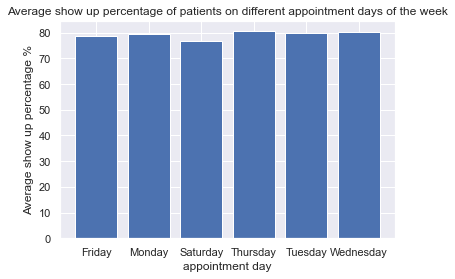

In [115]:
plt.bar(x=days,height=present_percentage)
plt.title('Average show up percentage of patients on different appointment days of the week');
plt.xlabel('appointment day');
plt.ylabel('Average show up percentage %');


### The results is almost the same of every week day
#### it looks like that which day of the week the patients has an appointment on doesn't really have an effect on whether the patient would show up or not

### Does the day of the week that patients scheduled on have  any siginficance that makes patients miss their appointment?


In [116]:
scheduled_week_days = df.groupby('scheduled_week_day')['present'].mean()
scheduled_week_days

scheduled_week_day
Friday       0.794502
Monday       0.802417
Saturday     0.958333
Thursday     0.795275
Tuesday      0.797806
Wednesday    0.798904
Name: present, dtype: float64

In [117]:
days = list(scheduled_week_days.index)
present_percentage = scheduled_week_days *100

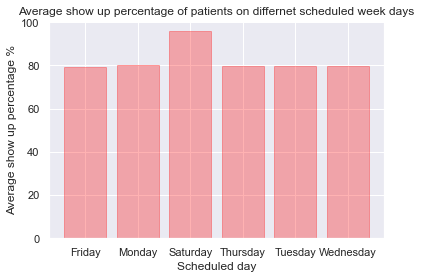

In [118]:
plt.bar(x=days,height=present_percentage,color="red",alpha=0.3,edgecolor="red")
plt.title('Average show up percentage of patients on differnet scheduled week days');
plt.xlabel('Scheduled day');
plt.ylabel('Average show up percentage %');

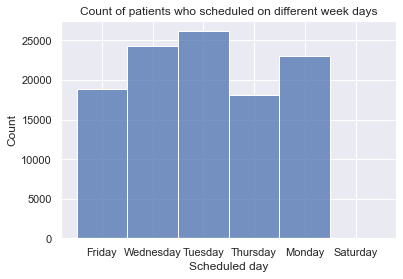

In [119]:
sns.histplot(data=df,x='scheduled_week_day');
plt.title('Count of patients who scheduled on different week days')
plt.xlabel('Scheduled day');

In [120]:
df.query('scheduled_week_day == "Saturday" ')['PatientId'].count()

24

### Looks like patients who scheduled on Saturday have higer chance of showing up 
#### but  as we can see from the histogram, data on patients who came in Saturday are much much lower than other days, there are only 24 patients on Saturday where in other days there are at least 15000 


### Does the age of patients affect wether patients show up to their appointments?


#### First I want to see how ages are distributed in this dataset with a histogram

In [121]:
# split patients who showed up and who didn't
show_up = df[df['No-show'] == 'No']
no_show_up = df[df['No-show'] == 'Yes']

In [122]:
# calculate averages
average_show_up_age = show_up['Age'].mean()
average_no_show_up_age = no_show_up['Age'].mean()
ages_average = [average_show_up_age,average_no_show_up_age]

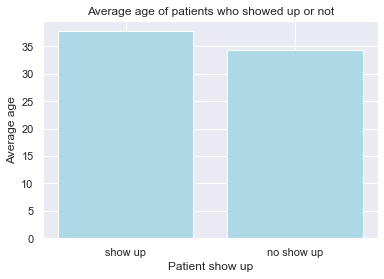

In [123]:
plt.bar(x=['show up','no show up'],height=ages_average,color="lightblue")
plt.title('Average age of patients who showed up or not');
plt.xlabel('Patient show up');
plt.ylabel('Average age');

### Looks like patients are slightly older show up to their appointments more
#### It's not really a huge differences between them it's only a couple of years 

### Does having scholarship have an effect on showing up or not?


In [124]:
scholarship = df.groupby('Scholarship').mean()['present']*100
scholarship

Scholarship
0    80.192645
1    76.263696
Name: present, dtype: float64

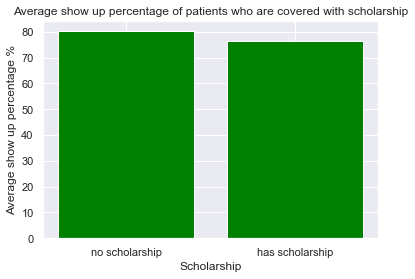

In [125]:
plt.bar(x=['no scholarship','has scholarship'],height=scholarship,color="green")
plt.title('Average show up percentage of patients who are covered with scholarship');
plt.xlabel('Scholarship');
plt.ylabel('Average show up percentage %');

### patients without scholarship are slightly more possible to show up but not by much

### Does the gender of patients matter?

In [126]:
gender = df.groupby('Gender')['present'].mean()
gender_label = list(gender.index)

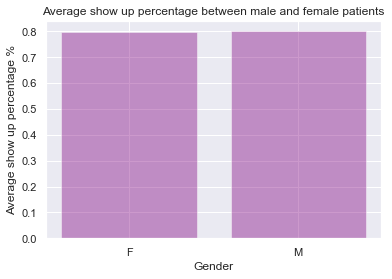

In [127]:
plt.bar(x=gender_label,height=gender,color="purple",alpha=0.4)
plt.title('Average show up percentage between male and female patients');
plt.xlabel('Gender');
plt.ylabel('Average show up percentage %');

### There is no apparent difference of showing up or not between male and female patients

<a id='conclusions'></a>
## Conclusions

### I explored this data to determine what things that patients who show up or not have in common and where they differ
#### 1 - which day of the week the appointment is on:
##### the results is the same for everyday. there is no apparent difference.
#### 2 - which day of the week the patient scheduled  on:
##### patients who have scheduled on Satudrday are more likely to show up than other days .
#### 3 - Pateint age:
##### average age of patients that show up is a couple of years higher than thoose who don't.
#### 4 - Pateint with scholarship:
##### There is no huge difference in here, but patients without scholarship are slightly more likely to show up.
#### 5 - Pateint gender:
##### patient gender doesn't appear to have any difference between patient's who showed up or not.
### Analysis limtations
#### The analysis were done on on a dataset from a single geographic location (Brazil) and it may differ when compared to other locations of the world, also as were shown In the above plots the appointments which are scheduled on Saturday are way fewer than other days  